In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [2]:
df= pd.read_excel(r"C:\Users\emman\Downloads\Nigerian Student's Year One Performance Survey(1-174).xlsx",index_col=0)
df.head()


,Start time,Completion time,Email,Name,Last modified time,Jamb score,English,Maths,Subject 3,Subject 4,...,How many courses did you offer in Year One?,"Did you fall sick in Year One? if yes, How many times do you remember (0 if none)",What was your study mode in Year 1,Did you study the course your originally applied for?,What was your monthly allowance in Year One?,Rate the teaching style / method of the lectures received in Year One,What type of higher institution did you attend in Year One\n,What year did you finish Year One?,What was your CGPA in Year One?,"What grading system does your school use ( if others, type numbers only)"
ID,,,,,,,,,,,,,,,,,,,,,
2,2023-09-30 09:42:21,2023-09-30 09:43:00,anonymous,NaN,NaN,300,B,A,A,B,...,16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),NaN,4.83,5
3,2023-09-30 10:06:49,2023-09-30 10:12:07,anonymous,NaN,NaN,313,B,A,A,A,...,13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),NaN,4.80,5
4,2023-10-02 07:00:32,2023-10-02 07:13:14,anonymous,NaN,NaN,249,C,B,B,B,...,5 to 8,6,Full Time,No,NaN,2,Public (Federal),NaN,3.1,5
5,2023-10-02 10:47:15,2023-10-02 10:52:56,anonymous,NaN,NaN,213,C,B,B,C,...,16 to 20,0,Full Time,No,NaN,1,Public (State),NaN,3.33,5
6,2023-10-02 10:51:42,2023-10-02 10:53:39,anonymous,NaN,NaN,345,C,A,A,A,...,0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),NaN,4.6,5


In [3]:
df.columns

Index(['Start time', 'Completion time', 'Email', 'Name', 'Last modified time',
       'Jamb score', 'English', 'Maths', 'Subject 3', 'Subject 4', 'Subject 5',
       'What was your age in Year One', 'Gender', 'Do you have a disability?',
       'Did you attend extra tutorials? ',
       'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?',
       'How would you rate your class attendance in Year One',
       'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)',
       'Rate your use of extra materials for study in Year One (Youtube, Other books, others).',
       'Morning', 'Afternoon', 'Evening', 'Late Night',
       'How many days per week did you do reading on average in Year One?',
       'On average, How many hours per day was used for personal study in Year One',
       'Did you teach your peers in Year One',
       'How many courses did you offer

In [4]:
df.shape

(174, 36)

In [5]:
new_column_names = {
    'ID': 'id',
    'Start time': 'start_time',
    'Completion time': 'completion_time',
    'Email': 'email',
    'Name': 'name',
    'Last modified time': 'last_modified_time',
    'Jamb score': 'jamb_score',
    'English': 'english',
    'Maths': 'maths',
    'Subject 3': 'subject_3',
    'Subject 4': 'subject_4',
    'Subject 5': 'subject_5',
    'What was your age in Year One': 'age_in_year_one',
    'Gender': 'gender',
    'Do you have a disability?': 'has_disability',
    'Did you attend extra tutorials? ': 'attended_tutorials',
    'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?': 'extracurricular_participation',
    'How would you rate your class attendance in Year One': 'class_attendance_rating',
    'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)': 'class_participation_rating',
    'Rate\xa0your use of extra materials for study in Year One (Youtube, Other books, others).': 'used_extra_study_materials',
    'Morning': 'morning_study',
    'Afternoon': 'afternoon_study',
    'Evening': 'evening_study',
    'Late Night': 'late_night_study',
    'How many days per week did you do reading on average in Year One?': 'days_per_week_reading',
    'On average, How many hours per day was used for personal study in Year One': 'hours_per_day_personal_study',
    'Did you teach your peers in Year One': 'taught_peers',
    'How many courses did you offer in Year One?': 'courses_offered',
    'Did you fall sick in Year One? if yes, How many times do you remember (0 if none)': 'times_fell_sick',
    'What was your study mode in Year 1': 'study_mode',
    'Did you study the course your originally applied for?': 'studied_original_course',
    'Rate your financial status in Year One': 'financial_status_rating',
    'Rate the teaching style / method of the lectures received in Year One': 'teaching_style_rating',
    'What type of higher institution did you attend in Year One\n': 'institution_type',
    'What was your CGPA in Year One?': 'cgpa_year_one',
    'What grading system does your school use ( if others, type numbers only)': 'grading_system'
}
df.rename(columns=new_column_names, inplace=True)

In [6]:
df.columns

Index(['start_time', 'completion_time', 'email', 'name', 'last_modified_time',
       'jamb_score', 'english', 'maths', 'subject_3', 'subject_4', 'subject_5',
       'age_in_year_one', 'gender', 'has_disability',
       'Did you attend extra tutorials? ', 'extracurricular_participation',
       'class_attendance_rating', 'class_participation_rating',
       'used_extra_study_materials', 'morning_study', 'afternoon_study',
       'evening_study', 'late_night_study', 'days_per_week_reading',
       'hours_per_day_personal_study', 'taught_peers', 'courses_offered',
       'times_fell_sick', 'study_mode', 'studied_original_course',
       'What was your monthly allowance in Year One?', 'teaching_style_rating',
       'institution_type', 'What year did you finish Year One?',
       'cgpa_year_one', 'grading_system'],
      dtype='object')

In [7]:
columns_to_drop = ['start_time', 'completion_time', 'email', 'name', 'last_modified_time']
df.drop(columns=columns_to_drop,inplace=True)
gpa_data= df.copy()
gpa_data

,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,Did you attend extra tutorials?,...,courses_offered,times_fell_sick,study_mode,studied_original_course,What was your monthly allowance in Year One?,teaching_style_rating,institution_type,What year did you finish Year One?,cgpa_year_one,grading_system
ID,,,,,,,,,,,,,,,,,,,,,
2,300,B,A,A,B,B,16,Male,No,Yes,...,16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),NaN,4.83,5
3,313,B,A,A,A,B,17,Male,No,No,...,13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),NaN,4.80,5
4,249,C,B,B,B,C,22,Male,No,No,...,5 to 8,6,Full Time,No,NaN,2,Public (Federal),NaN,3.1,5
5,213,C,B,B,C,B,17,Female,No,No,...,16 to 20,0,Full Time,No,NaN,1,Public (State),NaN,3.33,5
6,345,C,A,A,A,A,18,Male,No,Yes,...,0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),NaN,4.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,244,C,C,B,B,B,18,Female,No,Yes,...,13 to 16,4,Full Time,Yes,21 to 30k,6,Private,2023.0,3.45,4
172,288,C,C,C,C,C,20,Male,No,No,...,9 to 12,3,Full Time,Yes,31 to 50k,8,Private,2022.0,3.46,5
173,242,B,B,A,A,A,17,Male,No,No,...,13 to 16,0,Part Time,Yes,100k+,6,Private,2022.0,4.77,5


In [8]:

gpa_data.shape



(174, 31)

<AxesSubplot:ylabel='Frequency'>

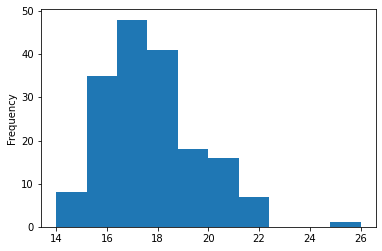

In [9]:
gpa_data.age_in_year_one.plot(kind='hist')

In [10]:
gpa_data.gender.value_counts()

Male      114
Female     60
Name: gender, dtype: int64

<AxesSubplot:xlabel='jamb_score', ylabel='Density'>

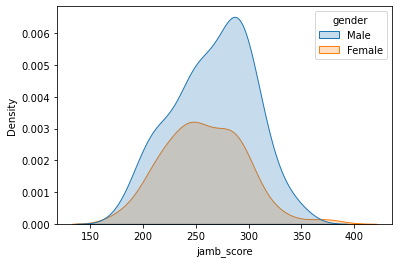

In [11]:
sns.kdeplot(data=df, x='jamb_score', hue='gender', fill=True)


In [81]:
gpa_data.isnull().sum()

jamb_score                                        0
english                                           0
maths                                             0
subject_3                                         0
subject_4                                         0
subject_5                                         0
age_in_year_one                                   0
gender                                            0
has_disability                                    0
Did you attend extra tutorials?                   0
extracurricular_participation                     0
class_attendance_rating                           0
class_participation_rating                        0
used_extra_study_materials                       10
morning_study                                     0
afternoon_study                                   0
evening_study                                     0
late_night_study                                  0
days_per_week_reading                             0
hours_per_da

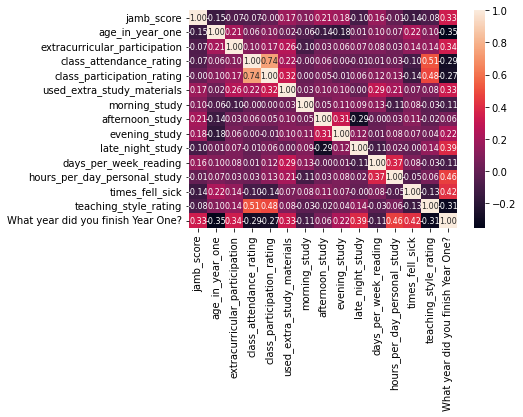

<Figure size 2160x2160 with 0 Axes>

In [13]:

gpa_data_comp_col= gpa_data[(gpa_data['cgpa_year_one'] != 'no idea')].copy()
corr_matrix= gpa_data_comp_col.corr()
ax=sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.figure(figsize=(30,30))

plt.show()

In [14]:
gpa_data_comp_col['cgpa_year_one'] = gpa_data_comp_col['cgpa_year_one'].str.replace('.o', '.0', regex=False)



# Convert 'cgpa_year1' to numeric, coercing errors to NaN
gpa_data_comp_col['cgpa_year_one'] = pd.to_numeric(gpa_data_comp_col['cgpa_year_one'], errors='coerce')

# Optional: Handle NaN values, e.g., by filling with a specific value or dropping
#gpa_data_comp_col['cgpa_year1'] = gpa_data_comp_col['cgpa_year1'].fillna(0)  # Replace NaN with 0 or any other value

# Convert 'cgpa_year1' to integer
gpa_data_comp_col['cgpa_year_one '] = gpa_data_comp_col['cgpa_year_one'].astype(float)


<AxesSubplot:xlabel='times_fell_sick', ylabel='Density'>

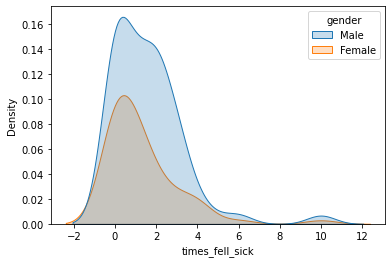

In [15]:
sns.kdeplot(data=gpa_data_comp_col, x='times_fell_sick', hue='gender', fill=True)


In [16]:
gpa_data_comp_col[gpa_data_comp_col['times_fell_sick']>0].shape

(111, 32)

In [17]:
gpa_data_comp_col[gpa_data_comp_col['times_fell_sick']==0].shape

(63, 32)

In [18]:
gpa_data_comp_col[gpa_data_comp_col['times_fell_sick']==1].shape


(40, 32)

In [19]:
gpa_data_comp_col[gpa_data_comp_col['times_fell_sick']==-1].shape

(0, 32)

<AxesSubplot:xlabel='cgpa_year_one', ylabel='Density'>

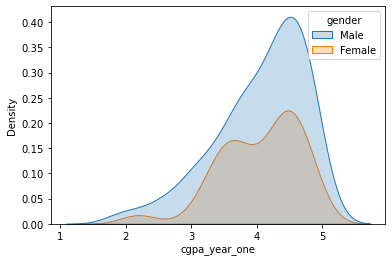

In [20]:
sns.kdeplot(data=gpa_data_comp_col[gpa_data_comp_col['cgpa_year_one']<=10], x='cgpa_year_one', hue='gender', fill=True)

<AxesSubplot:xlabel='cgpa_year_one', ylabel='Density'>

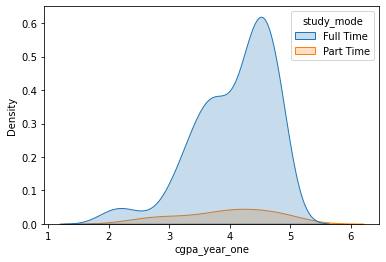

In [21]:
sns.kdeplot(data=gpa_data_comp_col[gpa_data_comp_col['cgpa_year_one']<=10], x='cgpa_year_one', hue='study_mode', fill=True)

<AxesSubplot:xlabel='cgpa_year_one', ylabel='Density'>

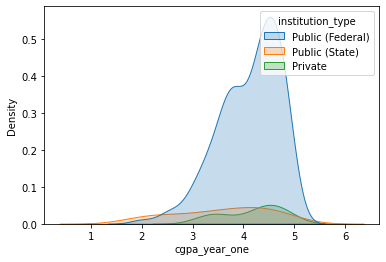

In [22]:
sns.kdeplot(data=gpa_data_comp_col[gpa_data_comp_col['cgpa_year_one']<=10], x='cgpa_year_one', hue='institution_type', fill=True)

<AxesSubplot:ylabel='institution_type'>

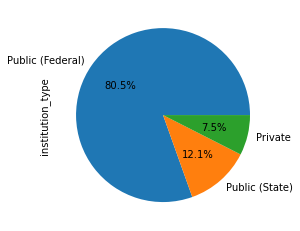

In [23]:
gpa_data_comp_col.institution_type.value_counts().plot(kind='pie', autopct='%1.1f%%')

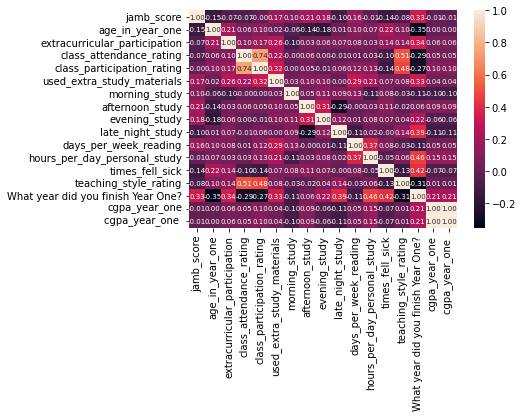

<Figure size 2160x2160 with 0 Axes>

In [24]:
corr_matrix= gpa_data_comp_col.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 7})
plt.figure(figsize=(30,30))

plt.show()

PRE-PROCESSING IDEAS

In [25]:
#JOIN THE WAEC COLUMNS AND TO MAKE A NEW FEATURE AND TEST FOR MUTUAL INFORMATION
#check out suitable clustering for the jamb results and use that as another new feature
#use the mutual information to assess all features as well as the correlation graph
#test for the best maximum tree depth in the dataset and min in the parameter for  the random forest
#get the diagram for the tree

NEW COLUMNS FOR GRADES

In [26]:

grade_features = ['maths', 'english','subject_3', 'subject_4', 'subject_5']
grade_to_value = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}

# Map grades to values
for col in grade_features:
    gpa_data_comp_col[col] = gpa_data_comp_col[col].map(grade_to_value)

# Calculate Combined_grade
gpa_data_comp_col['Combined_grade'] = (
    gpa_data_comp_col['english'] +
    gpa_data_comp_col['maths'] +
    gpa_data_comp_col['subject_3'] +

    gpa_data_comp_col['subject_4'] +
    gpa_data_comp_col['subject_5']
)

# Apply condition and update Combined_grade
gpa_data_comp_col.loc[
    (gpa_data_comp_col['maths'] < 1) | (gpa_data_comp_col['english'] < 1),
    'Combined_grade'
] = gpa_data_comp_col['Combined_grade'] / 3

RANKING OF COMBINED GRADE

In [27]:
bins = [0, 10, 15, 20]  # Define the edges of the bins
labels = ['Rank 3', 'Rank 2', 'Rank 1']  # Define labels for each bin

# Use pd.cut to create the 'grade_rank' column
gpa_data_comp_col['grade_rank'] = pd.cut(
    gpa_data_comp_col['Combined_grade'],
    bins=bins,
    labels=labels,
    right=True,  # Include the right edge of bins
    include_lowest=True  # Include the lowest edge
)

In [97]:
gpa_data_comp_col['grading_system']=gpa_data_comp_col['grading_system'].fillna(gpa_data_comp_col['grading_system'].median())


In [98]:
gpa_data_comp_col= gpa_data_comp_col.loc[(gpa_data_comp_col['cgpa_year_one']<=10)]
gpa_data_comp_col['grading_system'] = pd.to_numeric(gpa_data_comp_col['grading_system'], errors='coerce')
gpa_data_comp_col['grading_system'] = gpa_data_comp_col['grading_system'].astype(float)
gpa_data_comp_col['normalised_cgpa']= gpa_data_comp_col['cgpa_year_one']/ gpa_data_comp_col['grading_system']


In [99]:
def correct_ngpa(gpa_data_comp_col):
    def update_grading_system(row):
        if row['cgpa_year_one'] > row['grading_system']:
            if row['cgpa_year_one'] > 7:
                return '10'
            elif row['cgpa_year_one'] > 5:
                return '7'
            elif row['cgpa_year_one'] > 4:
                return '5'
            else:
                return '4'
        return row['grading_system']  # Return the original value if no condition is met
    
    # Apply the update_grading_system function to each row in the DataFrame
    gpa_data_comp_col['grading_system'] = gpa_data_comp_col.apply(update_grading_system, axis=1)

    return gpa_data_comp_col

In [100]:
gpa_data_comp_col = correct_ngpa(gpa_data_comp_col)

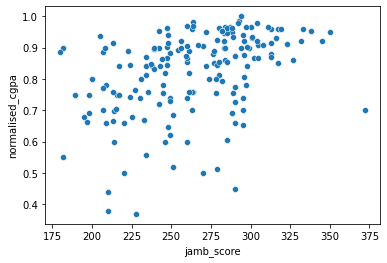

In [101]:
ac=sns.scatterplot(x= gpa_data_comp_col['jamb_score'],y= gpa_data_comp_col['normalised_cgpa'])
#plt.ylim(1, 5)  # Set the lower and upper limits of the y-axis


In [102]:
gpa_data_comp_col['grading_system']=gpa_data_comp_col['grading_system'].fillna(gpa_data_comp_col['grading_system'].median())

print(gpa_data_comp_col[['Combined_grade', 'normalised_cgpa']].isna().sum())  # Check for NaNs
print(np.isinf(gpa_data_comp_col[['Combined_grade', 'normalised_cgpa']]).sum())  # Check for infinite values


Combined_grade     0
normalised_cgpa    0
dtype: int64
Combined_grade     0
normalised_cgpa    0
dtype: int64


In [103]:
gpa_data_clean = gpa_data_comp_col[['Combined_grade', 'normalised_cgpa']].dropna()
gpa_data_clean1 = gpa_data_comp_col[['jamb_score', 'normalised_cgpa']].dropna()

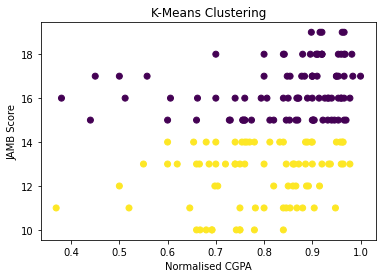

In [104]:
kmeans = KMeans(n_clusters=2)
gpa_data_clean['Cluster'] = kmeans.fit_predict(gpa_data_clean[['Combined_grade', 'normalised_cgpa']])

# Plotting the clusters
plt.scatter( gpa_data_clean['normalised_cgpa'],gpa_data_clean['Combined_grade'], c=gpa_data_clean['Cluster'], cmap='viridis')
plt.ylabel('JAMB Score')
plt.xlabel('Normalised CGPA')
plt.title('K-Means Clustering')
plt.show()

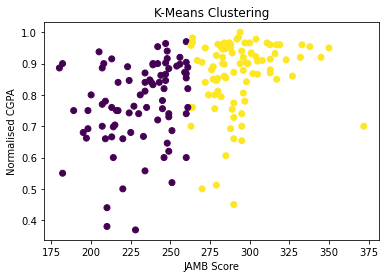

In [105]:
kmeans = KMeans(n_clusters=2)
gpa_data_clean1['Cluster'] = kmeans.fit_predict(gpa_data_clean1[['jamb_score', 'normalised_cgpa']])

# Plotting the clusters
plt.scatter(gpa_data_clean1['jamb_score'], gpa_data_clean1['normalised_cgpa'], c=gpa_data_clean1['Cluster'], cmap='viridis')
plt.xlabel('JAMB Score')
plt.ylabel('Normalised CGPA')
plt.title('K-Means Clustering')
plt.show()

In [106]:
gpa_data_comp_col['cluster']=gpa_data_clean1['Cluster']

In [107]:
gpa_data_comp_col.dtypes

jamb_score                                         int64
english                                            int64
maths                                              int64
subject_3                                          int64
subject_4                                          int64
subject_5                                          int64
age_in_year_one                                    int64
gender                                            object
has_disability                                    object
Did you attend extra tutorials?                   object
extracurricular_participation                      int64
class_attendance_rating                            int64
class_participation_rating                         int64
used_extra_study_materials                       float64
morning_study                                      int64
afternoon_study                                    int64
evening_study                                      int64
late_night_study               

In [121]:
discrete_features = gpa_data_comp_col.select_dtypes(include=['int64', 'float64']).columns
y= gpa_data_comp_col.pop('normalised_cgpa')

KeyError: 'normalised_cgpa'

In [118]:
y

ID
2      0.9660
3      0.9600
4      0.6200
5      0.6660
6      0.9200
        ...  
171    0.8625
172    0.6920
173    0.9540
174    0.4500
175    0.8540
Name: normalised_cgpa, Length: 172, dtype: float64

In [109]:
print(discrete_features)

Index(['jamb_score', 'english', 'maths', 'subject_3', 'subject_4', 'subject_5',
       'age_in_year_one', 'extracurricular_participation',
       'class_attendance_rating', 'class_participation_rating',
       'used_extra_study_materials', 'morning_study', 'afternoon_study',
       'evening_study', 'late_night_study', 'days_per_week_reading',
       'hours_per_day_personal_study', 'times_fell_sick',
       'teaching_style_rating', 'What year did you finish Year One?',
       'cgpa_year_one', 'grading_system', 'cgpa_year_one ', 'Combined_grade',
       'normalised_cgpa'],
      dtype='object')


In [110]:
X=gpa_data_comp_col.select_dtypes(include=['int64', 'float64'])


In [122]:
len(X.columns)== len(discrete_features)

True

In [111]:
X.columns

Index(['jamb_score', 'english', 'maths', 'subject_3', 'subject_4', 'subject_5',
       'age_in_year_one', 'extracurricular_participation',
       'class_attendance_rating', 'class_participation_rating',
       'used_extra_study_materials', 'morning_study', 'afternoon_study',
       'evening_study', 'late_night_study', 'days_per_week_reading',
       'hours_per_day_personal_study', 'times_fell_sick',
       'teaching_style_rating', 'What year did you finish Year One?',
       'cgpa_year_one', 'grading_system', 'cgpa_year_one ', 'Combined_grade'],
      dtype='object')

In [112]:
print(list(X.columns))


['jamb_score', 'english', 'maths', 'subject_3', 'subject_4', 'subject_5', 'age_in_year_one', 'extracurricular_participation', 'class_attendance_rating', 'class_participation_rating', 'used_extra_study_materials', 'morning_study', 'afternoon_study', 'evening_study', 'late_night_study', 'days_per_week_reading', 'hours_per_day_personal_study', 'times_fell_sick', 'teaching_style_rating', 'What year did you finish Year One?', 'cgpa_year_one', 'grading_system', 'cgpa_year_one ', 'Combined_grade']


In [126]:
X['used_extra_study_materials']=X['used_extra_study_materials'].fillna(X['used_extra_study_materials'].median())
X['What year did you finish Year One?']=X['What year did you finish Year One?'].fillna(X['What year did you finish Year One?'].median())


X.shape

(172, 24)

In [139]:
print(categorical_columns)

[     gender has_disability Did you attend extra tutorials?   \
ID                                                            
2      Male             No                              Yes   
3      Male             No                               No   
4      Male             No                               No   
5    Female             No                               No   
6      Male             No                              Yes   
..      ...            ...                              ...   
171  Female             No                              Yes   
172    Male             No                               No   
173    Male             No                               No   
174  Female             No                               No   
175    Male             No                               No   

                            taught_peers courses_offered study_mode  \
ID                                                                    
2              Yes, but just a few ti

In [153]:
Z = gpa_data_comp_col.drop(['What year did you finish Year One?', 'english', 'maths', 'subject_3', 'subject_4', 'subject_5'], axis=1)  # Features excluding 'id' and 'GPA_normal'
  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

categorical_columns =  [col for col in X_train.columns if X_train[col].dtype in ['object','category']]
ordinal_cod= OrdinalEncoder()
X_train[categorical_columns] = ordinal_cod.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = ordinal_cod.transform(X_test[categorical_columns])


# Initialize the Linear Regression model
model = XGBRegressor(
    base_score= 0.5,
    booster='gbtree',
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.05,        # Learning rate
    max_depth=6,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42 )

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

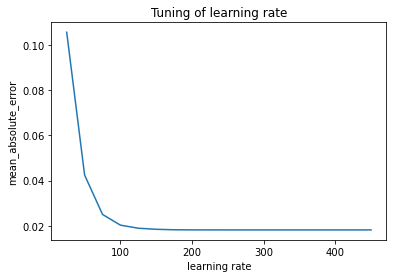

In [159]:
def get_score2(n_estimators):
    model=XGBRegressor(
    base_score= 0.5,
    booster='gbtree',
    n_estimators=n_estimators,          # Number of boosting rounds
    learning_rate=0.05,        # Learning rate
    max_depth=6,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42
    ) 

    scores = -1 * cross_val_score(model,X_train,y_train,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,19):
    results[25*i] = get_score2(25*i)
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('learning rate')
plt.ylabel('mean_absolute_error')
plt.title('Tuning of learning rate')
plt.show()

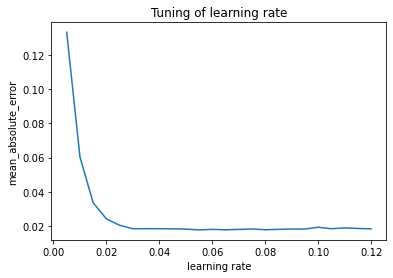

In [165]:
def get_score2(learning_rate):
    model=XGBRegressor(
    base_score= 0.5,
    booster='gbtree',
    n_estimators=200,          # Number of boosting rounds
    learning_rate= learning_rate,        # Learning rate
    max_depth=6,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42
    ) 

    scores = -1 * cross_val_score(model,X_train,y_train,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,25):
    results[0.005*i] = get_score2(0.005*i)
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('learning rate')
plt.ylabel('mean_absolute_error')
plt.title('Tuning of learning rate')
plt.show()

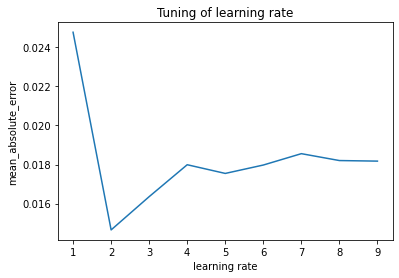

In [166]:
def get_score2(max_depth):
    model=XGBRegressor(
    base_score= 0.5,
    booster='gbtree',
    n_estimators=200,          # Number of boosting rounds
    learning_rate= 0.06,        # Learning rate
    max_depth=max_depth,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42
    ) 

    scores = -1 * cross_val_score(model,X_train,y_train,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,10):
    results[1*i] = get_score2(1*i)
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('learning rate')
plt.ylabel('mean_absolute_error')
plt.title('Tuning of learning rate')
plt.show()

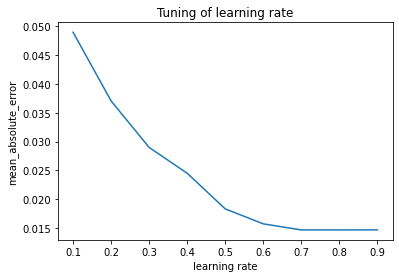

In [168]:
def get_score2(colsample_bytree):
    model=XGBRegressor(
    base_score= 0.5,
    booster='gbtree',
    n_estimators=200,          # Number of boosting rounds
    learning_rate= 0.06,        # Learning rate
    max_depth=2,               # Maximum depth of each tree
    colsample_bytree=colsample_bytree,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42
    ) 

    scores = -1 * cross_val_score(model,X_train,y_train,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,10):
    results[0.1*i] = get_score2(0.1*i)
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('learning rate')
plt.ylabel('mean_absolute_error')
plt.title('Tuning of learning rate')
plt.show()

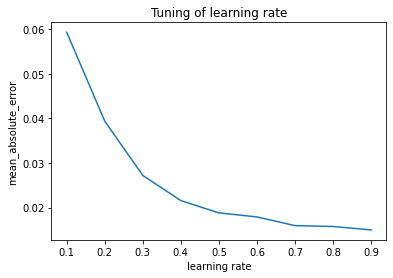

In [173]:
def get_score2(colsample_bylevel):
    model=XGBRegressor(
    colsample_bylevel=colsample_bylevel, 
    colsample_bynode=None,
    base_score= 0.5,
    booster='gbtree',
    n_estimators=200,          # Number of boosting rounds
    learning_rate= 0.06,        # Learning rate
    max_depth=2,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42
    ) 

    scores = -1 * cross_val_score(model,X_train,y_train,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,10):
    results[0.1*i] = get_score2(0.1*i)
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('learning rate')
plt.ylabel('mean_absolute_error')
plt.title('Tuning of learning rate')
plt.show()

In [210]:
model1=XGBRegressor(
    
    base_score= 0.4,
    booster='gbtree',
    n_estimators=200,          # Number of boosting rounds
    learning_rate= 0.06,        # Learning rate
    max_depth=2,               # Maximum depth of each tree
    colsample_bytree=0.8,      # Column subsampling ratio per tree
    n_jobs=-1,                 # Use all available cores
    random_state=42,
    
    ) 


In [211]:
model1.fit(X_train, y_train)

XGBRegressor(base_score=0.4, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [212]:
preds= model1.predict(X_test)
print(mean_absolute_error(y_test,preds))


0.009503877551215048
